In [20]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout


train_df = pd.read_csv("Daten_mit_Tourismuswerten_und_imputierten_Wetterdaten/train_df.csv")
validation_df = pd.read_csv("Daten_mit_Tourismuswerten_und_imputierten_Wetterdaten/validation_df.csv")

training_features = train_df.drop(columns=['Datum', "Umsatz"])
training_labels = train_df["Umsatz"]
validation_features = validation_df.drop(columns=['Datum', "Umsatz"])
validation_labels = validation_df["Umsatz"]

model = Sequential([
  InputLayer(shape=(training_features.shape[1], )),
  BatchNormalization(),
  Dense(100, activation='relu'),
  Dense(40, activation='relu'),
  Dense(10, activation='relu'),
  Dense(1)
])

model.compile(loss="mse", optimizer=Adam(learning_rate=0.001))

history = model.fit(training_features, training_labels, epochs=20,
                    validation_data=(validation_features, validation_labels))



Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 48433.9141 - val_loss: 4743.0615
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6191.3853 - val_loss: 4616.1807
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6776.6704 - val_loss: 3936.9558
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5252.3823 - val_loss: 4279.5034
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5432.5557 - val_loss: 5371.4443
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5590.8516 - val_loss: 5134.0728
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5067.1104 - val_loss: 4449.5664
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5308.3833 - val_loss: 3579.9490
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5015.9038 - val_loss: 4095.8091
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5731.7319 - val_loss: 4438.6641
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6066.0894 - val_l

In [21]:
print(training_features.columns)

Index(['KielerWoche', 'rain_weather', 'snow_weather', 'Feiertag',
       'Season_Temp_Fall_low', 'Season_Temp_Fall_middle', 'Uebernachtungen',
       'Season_Temp_Spring_high', 'Season_Temp_Spring_low',
       'Season_Temp_Spring_middle', 'Season_Temp_Summer_high',
       'Season_Temp_Summer_low', 'Season_Temp_Summer_middle',
       'Season_Temp_Winter_high', 'Season_Temp_Winter_low',
       'Season_Temp_Winter_middle', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Saturday', 'Sunday', 'Warengruppe_2', 'Warengruppe_3',
       'Warengruppe_4', 'Warengruppe_5', 'Warengruppe_6'],
      dtype='object')


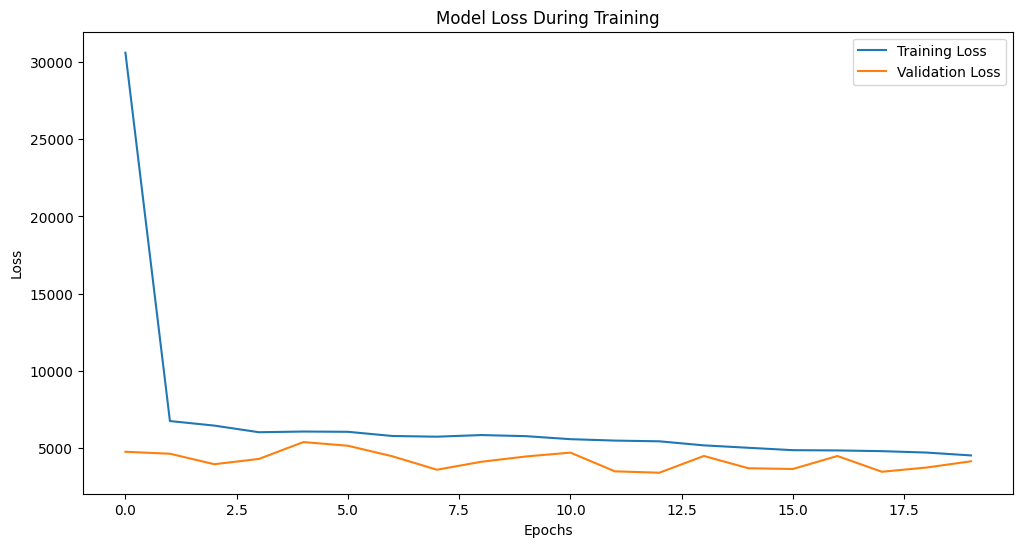

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
import numpy as np

""" def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100 """

from sklearn.metrics import mean_absolute_percentage_error

training_predictions = model.predict(training_features)
validation_predictions = model.predict(validation_features)

mape = mean_absolute_percentage_error(validation_labels, validation_predictions)
mape2 = mean_absolute_percentage_error(training_labels, training_predictions)

print(f"MAPE on the Validation Data: {mape:.2f}")
print(f"MAPE on the Training Data: {mape2:.2f}")

""" print(f"MAPE on the Training Data: {mape(training_labels, training_predictions):.2f}%")
print(f"MAPE on the Validation Data: {mape(validation_labels, validation_predictions):.2f}%") """

235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step
MAPE on the Validation Data: 0.27
MAPE on the Training Data: 0.24


' print(f"MAPE on the Training Data: {mape(training_labels, training_predictions):.2f}%")\nprint(f"MAPE on the Validation Data: {mape(validation_labels, validation_predictions):.2f}%") '

In [24]:
mask1 = (validation_features['Warengruppe_2'] == 0) & (validation_features['Warengruppe_3'] == 0) & (validation_features['Warengruppe_4'] == 0) & (validation_features['Warengruppe_5'] == 0) & (validation_features['Warengruppe_6'] == 0)

validation_predictions_warengruppe1 = validation_predictions[mask1]
validation_labels_warengruppe1 = validation_labels[mask1]

warengruppe1_mape = mean_absolute_percentage_error(validation_labels_warengruppe1, validation_predictions_warengruppe1)


# Create masks for each Warengruppe
mask2 = (validation_features['Warengruppe_2'] == 1)
mask3 = (validation_features['Warengruppe_3'] == 1)
mask4 = (validation_features['Warengruppe_4'] == 1)
mask5 = (validation_features['Warengruppe_5'] == 1)
mask6 = (validation_features['Warengruppe_6'] == 1)

# Calculate MAPE for each Warengruppe
validation_predictions_warengruppe2 = validation_predictions[mask2]
validation_labels_warengruppe2 = validation_labels[mask2]
warengruppe2_mape = mean_absolute_percentage_error(validation_labels_warengruppe2, validation_predictions_warengruppe2)

validation_predictions_warengruppe3 = validation_predictions[mask3]
validation_labels_warengruppe3 = validation_labels[mask3]
warengruppe3_mape = mean_absolute_percentage_error(validation_labels_warengruppe3, validation_predictions_warengruppe3)

validation_predictions_warengruppe4 = validation_predictions[mask4]
validation_labels_warengruppe4 = validation_labels[mask4]
warengruppe4_mape = mean_absolute_percentage_error(validation_labels_warengruppe4, validation_predictions_warengruppe4)

validation_predictions_warengruppe5 = validation_predictions[mask5]
validation_labels_warengruppe5 = validation_labels[mask5]
warengruppe5_mape = mean_absolute_percentage_error(validation_labels_warengruppe5, validation_predictions_warengruppe5)

validation_predictions_warengruppe6 = validation_predictions[mask6]
validation_labels_warengruppe6 = validation_labels[mask6]
warengruppe6_mape = mean_absolute_percentage_error(validation_labels_warengruppe6, validation_predictions_warengruppe6)

print(f"MAPE for Warengruppe 1: {warengruppe1_mape:.2f}")
print(f"MAPE for Warengruppe 2: {warengruppe2_mape:.2f}")
print(f"MAPE for Warengruppe 3: {warengruppe3_mape:.2f}")
print(f"MAPE for Warengruppe 4: {warengruppe4_mape:.2f}")
print(f"MAPE for Warengruppe 5: {warengruppe5_mape:.2f}")
print(f"MAPE for Warengruppe 6: {warengruppe6_mape:.2f}")

MAPE for Warengruppe 1: 0.27
MAPE for Warengruppe 2: 0.22
MAPE for Warengruppe 3: 0.26
MAPE for Warengruppe 4: 0.30
MAPE for Warengruppe 5: 0.28
MAPE for Warengruppe 6: 0.60


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


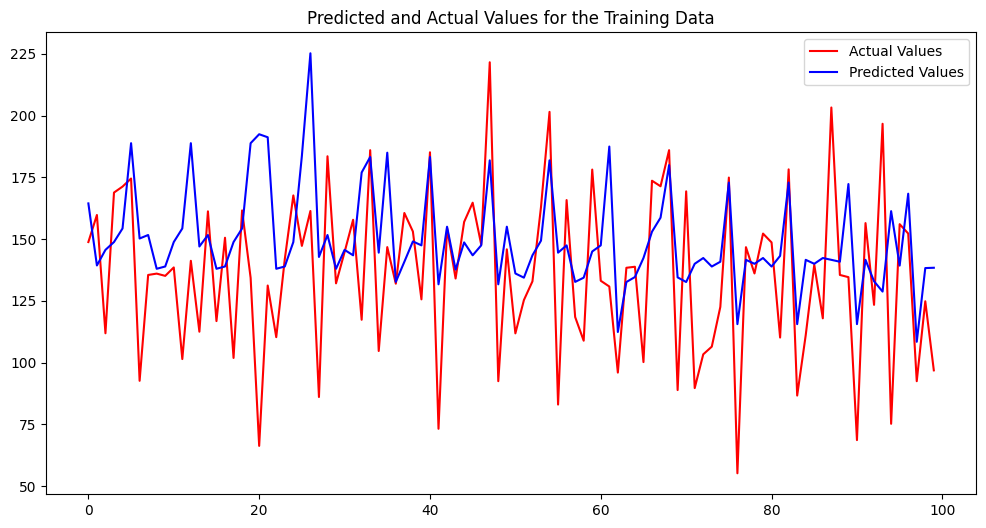

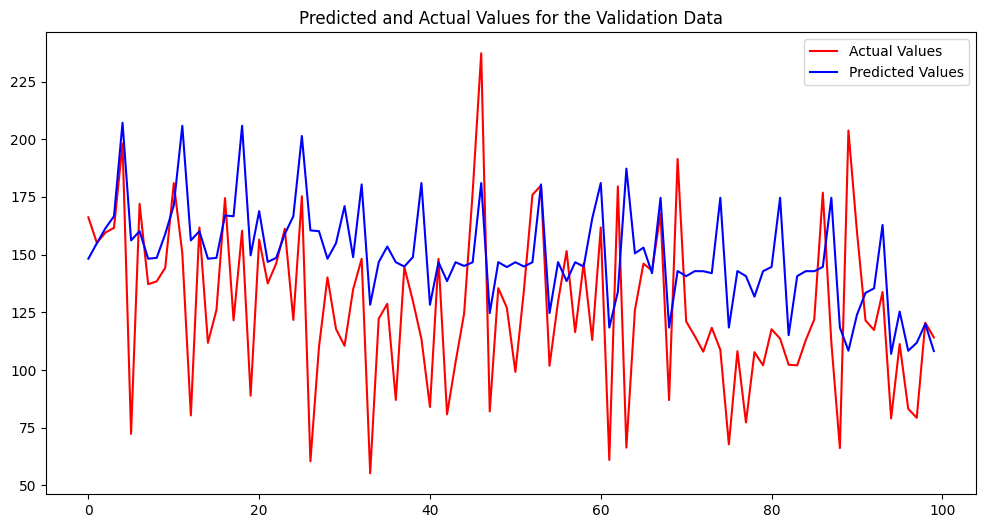

In [14]:
def plot_predictions(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['actual'], label='Actual Values', color='red')
    plt.plot(data['prediction'], label='Predicted Values', color='blue')
    plt.title(title)
    plt.legend()
    plt.show()

# Ensure that training_predictions, validation_predictions, training_labels, and validation_labels are numpy arrays
training_predictions = np.array(training_predictions).flatten()
validation_predictions = np.array(validation_predictions).flatten()
training_labels = np.array(training_labels).flatten()
validation_labels = np.array(validation_labels).flatten()

# print the type of the predictions
print(type(training_predictions))
print(type(validation_predictions))

# Create DataFrames with 1-dimensional arrays
data_train = pd.DataFrame({'prediction': training_predictions, 'actual': training_labels})
data_validation = pd.DataFrame({'prediction': validation_predictions, 'actual': validation_labels})

# Plot predictions
plot_predictions(data_train.head(100), 'Predicted and Actual Values for the Training Data')
plot_predictions(data_validation.head(100), 'Predicted and Actual Values for the Validation Data')

In [15]:
test_df = pd.read_csv("Daten_mit_Tourismuswerten_und_imputierten_Wetterdaten/test_df.csv")

test_features = test_df.drop(columns=['id', "Datum", "Umsatz"])

predictions = model.predict(test_features)

test_df['Umsatz'] = predictions

submission_df = test_df[['id', 'Umsatz']]

submission_df.to_csv("submission.csv", index=False)

2025-01-06 21:28:08.221858: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: INVALID_ARGUMENT: Incompatible shapes: [32,28] vs. [27]
	 [[{{node sequential_1_1/batch_normalization_1_1/batchnorm/mul_1}}]]


InvalidArgumentError: Graph execution error:

Detected at node sequential_1_1/batch_normalization_1_1/batchnorm/mul_1 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/codespace/.local/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/codespace/.local/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/codespace/.local/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/codespace/.local/lib/python3.12/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/local/python/3.12.1/lib/python3.12/asyncio/base_events.py", line 638, in run_forever

  File "/usr/local/python/3.12.1/lib/python3.12/asyncio/base_events.py", line 1971, in _run_once

  File "/usr/local/python/3.12.1/lib/python3.12/asyncio/events.py", line 84, in _run

  File "/home/codespace/.local/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/codespace/.local/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/codespace/.local/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/codespace/.local/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/home/codespace/.local/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/codespace/.local/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/home/codespace/.local/lib/python3.12/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/codespace/.local/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/home/codespace/.local/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/home/codespace/.local/lib/python3.12/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/home/codespace/.local/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/home/codespace/.local/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/home/codespace/.local/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/tmp/ipykernel_2802/840339348.py", line 5, in <module>

  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 559, in predict

  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 256, in one_step_on_data_distributed

  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 246, in one_step_on_data

  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 101, in predict_step

  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/layer.py", line 899, in __call__

  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/models/sequential.py", line 213, in call

  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/models/functional.py", line 182, in call

  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/ops/function.py", line 171, in _run_through_graph

  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/models/functional.py", line 632, in call

  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/layer.py", line 899, in __call__

  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/normalization/batch_normalization.py", line 278, in call

  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/ops/nn.py", line 2082, in batch_normalization

  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py", line 840, in batch_normalization

Incompatible shapes: [32,28] vs. [27]
	 [[{{node sequential_1_1/batch_normalization_1_1/batchnorm/mul_1}}]] [Op:__inference_one_step_on_data_distributed_67462]